# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient simulated in Pulse with no sepsis, with their sepsis counterpart. 

In [16]:
import pandas as pd
icustayid = 34541.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [17]:
simulation_sepsis = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613253679.csv")
simulation_sepsis = simulation_sepsis.replace(r"[\[|\]]", "", regex=True)

In [18]:
simulation_sepsis.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,64.29129323913278,6630.004709562064,0.33084171684761815,37.00816781954296,60.371984092468914,33.31863133739734,107.14285714285711,-0.07449999999999998,79.22133043199405,0.973764148513535,19.8675496688742,0.0,95.49996962243978,7.271906e+09
1,95.91593191365696,7075.744361129683,5.5879000235912715,37.29885558934376,58.53352968448597,33.654332345076284,96.77419354838706,0.1830000000000005,79.58206575236056,0.9735156011857755,20.40816326530615,10800.000000142898,98.5682949480001,7.271916e+09
2,57.60389111723216,7198.524011458321,26.408805438936845,37.30125199386271,57.501902469128254,33.66905283224869,93.74999999999996,-0.0369999999999997,79.22456945402823,0.9734937769745957,20.40816326530615,14400.000000221478,98.8415229074554,7.271920e+09
3,71.2095501611617,7311.307671347868,13.35042020565441,37.301806300897056,56.87239641712278,33.671747554120834,90.90909090909086,-0.018000000000000127,79.640428355305,0.9735277638787535,20.40816326530615,18000.000000300057,100.1881318383053,7.271924e+09
4,54.686118985051074,9843.529403987628,33.79641152429897,37.266697960315014,44.19421194318981,33.68812375353436,58.823529411764675,-0.018000000000000127,82.48224017106101,0.9737043970030456,20.134228187919494,21600.000000378637,120.78802755840675,7.271927e+09


In [19]:
len(simulation_sepsis)

51

In [20]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [21]:
len(simulation)

51

In [22]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,64.65428122828418,6629.589443795697,13.462977901619118,37.00621132331747,59.408885375053906,33.27241631459346,103.44827586206893,0.04999999999999938,78.75266996995761,0.9741894593784619,19.8675496688742,0.0,95.6512182708684,7.271906e+09
1,68.3971926895191,7088.668972243771,0.323908152303489,37.29893115397675,57.547953280957536,33.643492913136285,93.74999999999996,0.0,79.11214021752207,0.9734990449424442,20.40816326530615,10800.000000142898,98.49454772729868,7.271916e+09
2,62.649858219909795,7216.69854510975,34.26697722802681,37.30171495658658,56.91728776280954,33.654023293994626,90.90909090909086,0.0,79.19519476969617,0.9735057501123703,20.40816326530615,14400.000000221478,99.33547002923623,7.271920e+09
3,79.64976229944479,7334.629484957494,0.3249326809936441,37.30203723563301,56.034259147514646,33.662948209537454,88.23529411764703,0.6680000000000001,79.36942416426253,0.9735252649100706,20.40816326530615,18000.000000300057,100.49028338895303,7.271924e+09
4,91.99009125161292,9868.498958102167,28.797407122205946,37.2674884118922,44.81316078611147,33.70367162084748,58.823529411764675,-0.03500000000000003,82.78949039463457,0.9737192039390876,20.134228187919494,21600.000000378637,121.0100243445633,7.271927e+09


In [23]:
time = simulation_sepsis['time']
diaBP_sepsis = simulation_sepsis['DiastolicArterialPressure (mmHg)']
diaBP_no_sepsis = simulation['DiastolicArterialPressure (mmHg)']

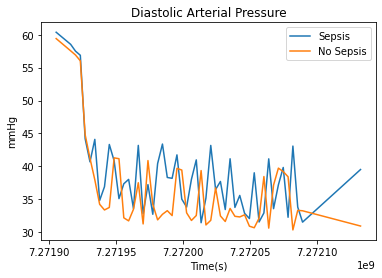

In [24]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_sepsis))
plt.plot(time, pd.to_numeric(diaBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

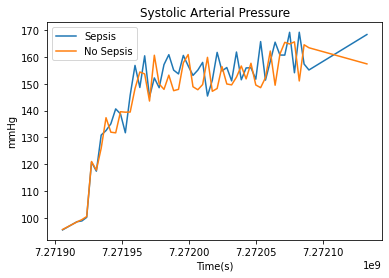

In [25]:
sysBP_sepsis = simulation_sepsis['SystolicArterialPressure (mmHg)']
sysBP_no_sepsis = simulation['SystolicArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(sysBP_sepsis))
plt.plot(time, pd.to_numeric(sysBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

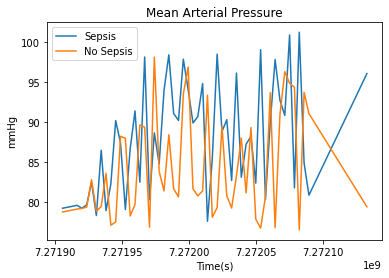

In [26]:
meanBP_sepsis = simulation_sepsis['MeanArterialPressure (mmHg)']
meanBP_no_sepsis = simulation['MeanArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(meanBP_sepsis))
plt.plot(time, pd.to_numeric(meanBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

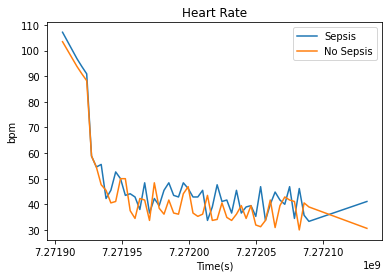

In [27]:
HR_sepsis = simulation_sepsis['HeartRate (1/min)']
HR_no_sepsis = simulation['HeartRate (1/min)']
plt.plot(time, pd.to_numeric(HR_sepsis))
plt.plot(time, pd.to_numeric(HR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

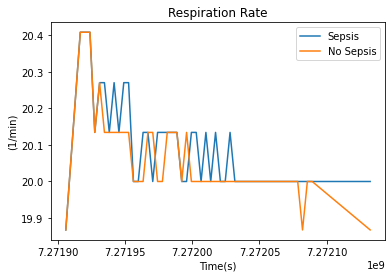

In [28]:
RR_sepsis = simulation_sepsis['RespirationRate (1/min)']
RR_no_sepsis = simulation['RespirationRate (1/min)']
plt.plot(time, pd.to_numeric(RR_sepsis))
plt.plot(time, pd.to_numeric(RR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

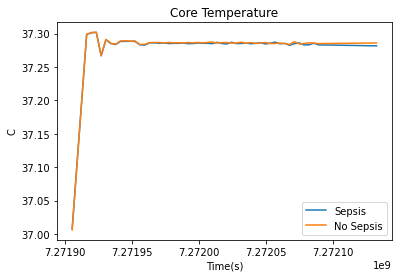

In [29]:
temp_sepsis = simulation_sepsis['CoreTemperature (degC)']
temp_no_sepsis = simulation['CoreTemperature (degC)']
plt.plot(time, pd.to_numeric(temp_sepsis))
plt.plot(time, pd.to_numeric(temp_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()